<a href="https://colab.research.google.com/github/Parishri07/Medical-Imaging-using-PyTorch/blob/main/NIfTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dicom2nifti

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 82.0 MB/s eta 0:00:00


In [3]:
import dicom2nifti

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
path_to_dicom = "/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000002"

In [23]:
output_path = "/content/sample_data"

dicom2nifti.convert_directory(path_to_dicom, output_path)

In [18]:
import nibabel as nib, matplotlib.pyplot as plt

In [24]:
nifti = nib.load("/content/sample_data/301_dwi_anonymized.nii.gz")

In [25]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (288, 288, 25, 5)
affine:
[[-8.14996898e-01  1.85306575e-02  2.94511348e-01  1.21936066e+02]
 [ 2.05970202e-02  8.14844251e-01  3.09533834e-01 -1.12818481e+02]
 [ 3.90408374e-02 -4.30558622e-02  5.98476839e+00 -6.33279419e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4 288 288  25   5   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         0.8161914  0.8161914  6.         1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2

In [26]:
nifti.header["qoffset_x"]

array(121.936066, dtype=float32)

In [27]:
nifti.shape

(288, 288, 25, 5)

In [31]:
image_array = nifti.get_fdata()

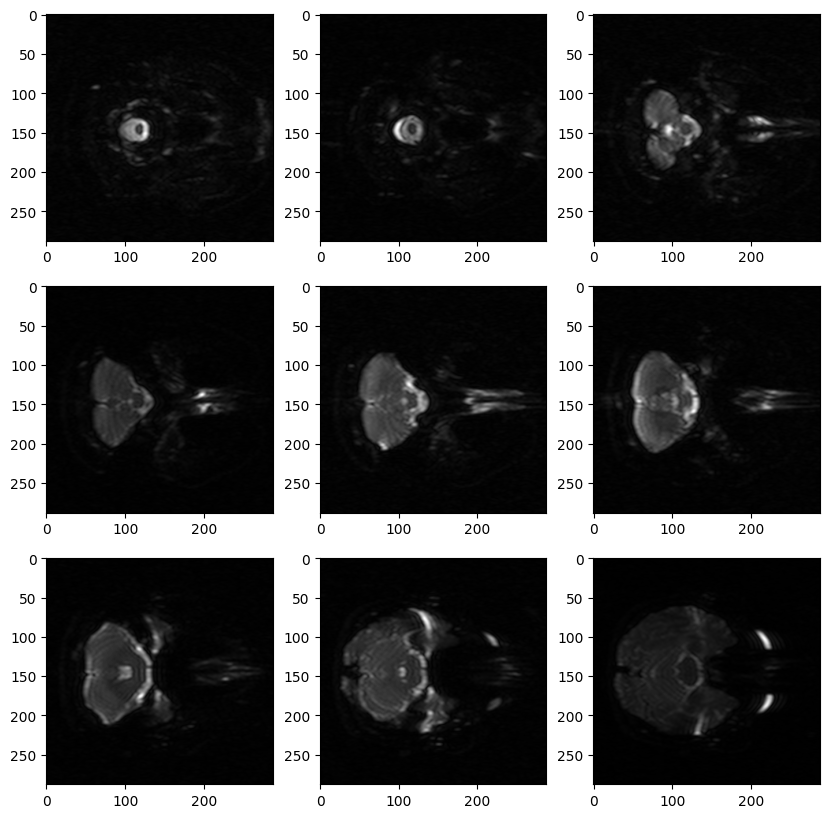

In [38]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    # Select a 2D slice from the 4D array
    axis[i, j].imshow(image_array[:, :, slice_counter, 0], cmap="gray")
    slice_counter += 1

In [39]:
image_array_processed = image_array * (image_array > 300)

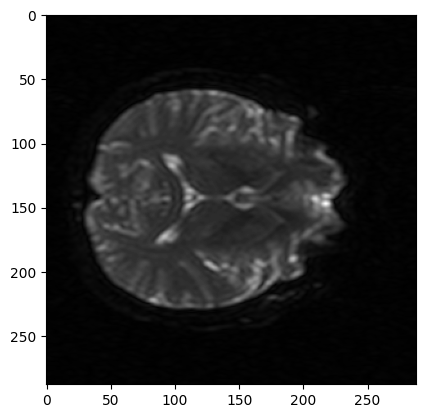

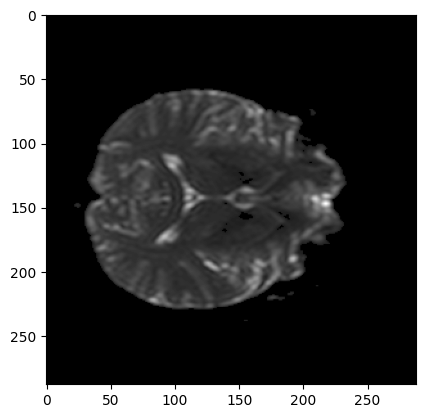

In [40]:
plt.figure()
plt.imshow(image_array[:, :, 13, 0], cmap="gray")
plt.figure()
plt.imshow(image_array_processed[:, :, 13, 0], cmap="gray")

In [41]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine, nifti.header)

In [45]:
nib.save(processed_nifti, "/content/sample_data/301_dwi_anonymized_processed.nii.gz")